# Importing Libraries
Import pandas, matplotlib, seaborn, numpy, and warnings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings as wr

# Loading and Reading Dataset

In [2]:
dataset = pd.read_excel("E-Commerce Sales.xlsx")

In [3]:
pd.set_option("display.max_columns",24)

In [69]:
dataset.head(6)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 194,0.37,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.0523,37,2011.67,88524


# Cleaning the Data

In [10]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [14]:
dataset.shape

(9426, 24)

In [11]:
dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

In [19]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

# Data Analysis and Visualization of Order Priority

In [32]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [33]:
dataset['Order Priority']= dataset["Order Priority"].replace("Critical ","Critical")

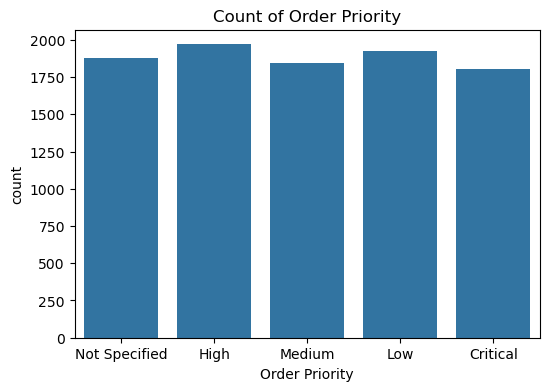

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Ship Mode

In [37]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [42]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

# Pie chart of ship mode percentages

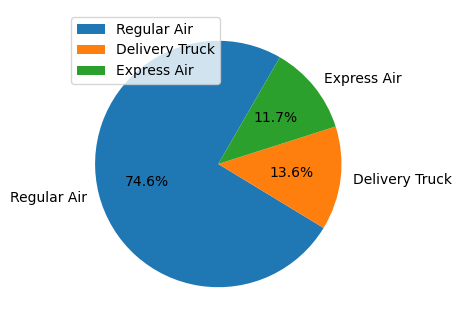

In [109]:
plt.figure(figsize=(6,4))
plt.pie(y,labels=x,startangle=60, autopct="%0.1f%%")
plt.savefig("% of Ship Mode.jpg")
plt.legend(loc=2)
plt.show()

# Ship mode distribution by product category

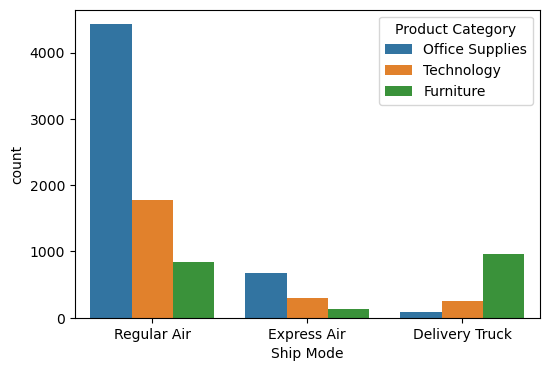

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.savefig("Count Of Ship mode and Product Category.jpg")
plt.show()

# Visualize customer segment distribution

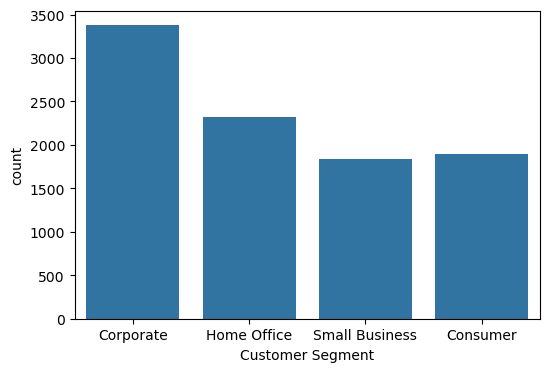

In [99]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data=dataset)
plt.savefig("% of Ship Mode.jpg")
plt.show()

# Product Category

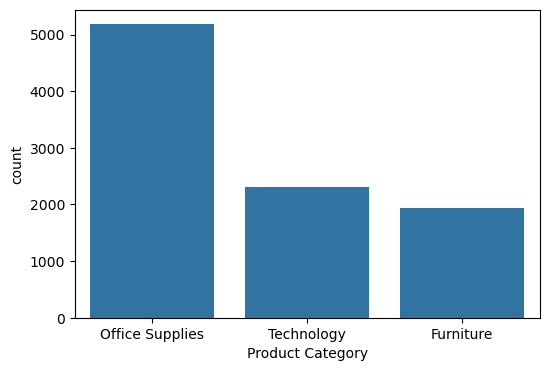

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data=dataset)
plt.savefig("Count of Product Category.jpg")
plt.show()

# Analyze sub-categories within each main category (Office Supplies, Technology, Furniture)

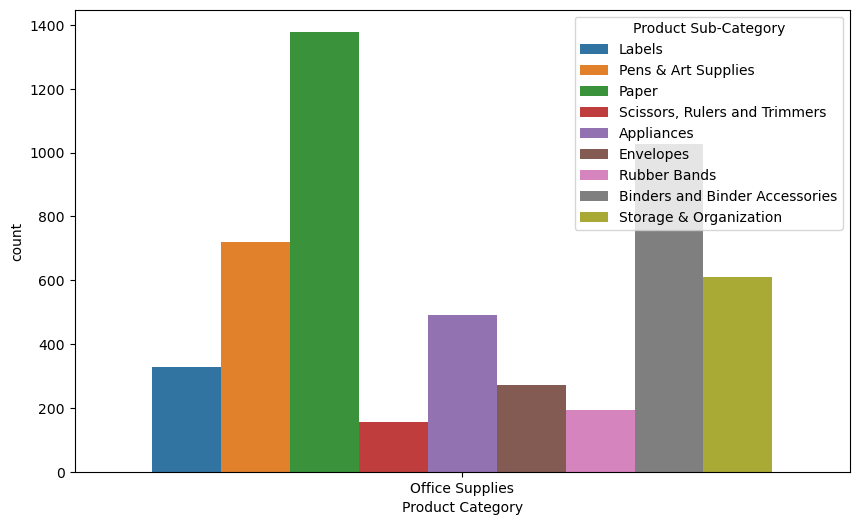

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.savefig("count of product category and office supplies.jpg")
plt.show()

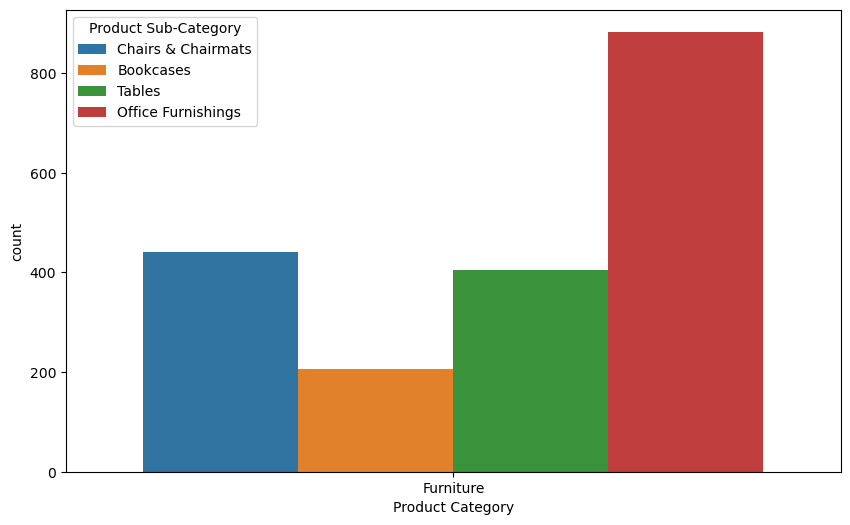

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"]=="Furniture"], hue="Product Sub-Category")
plt.savefig("count of product category and furniture.jpg")
plt.show()

#  Order Year Analysis

In [107]:
#Extracted order year from order date

In [75]:
dataset["Order Year"] = dataset['Order Date'].dt.year

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [79]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

# Visualize order count by year

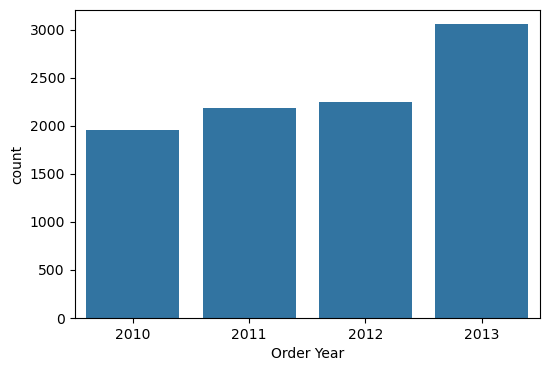

In [104]:
plt.figure(figsize=(6,4))
sns.countplot(x='Order Year',data=dataset)
plt.savefig("count of order year.jpg")
plt.show()

# Visualize profit by product category

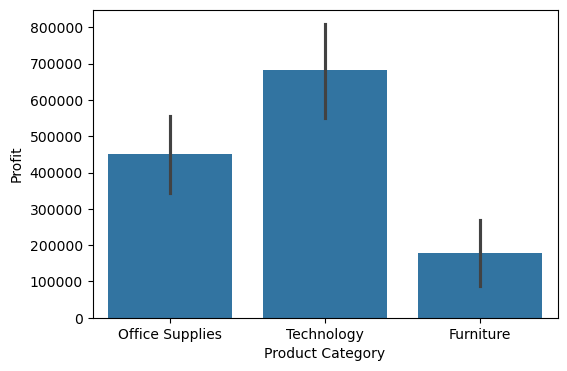

In [105]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.savefig("count of product category and profit.jpg")
plt.show()

# Top 5 states by order count

In [84]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Product Base Margin Analysis

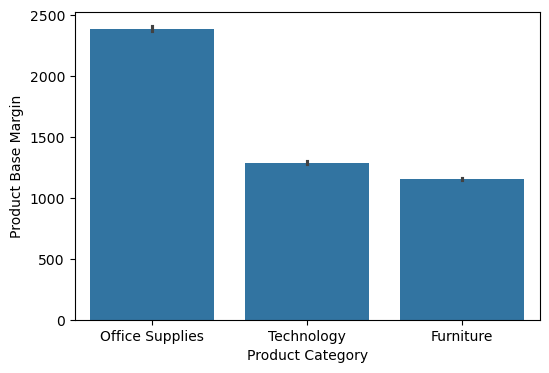

In [106]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.savefig("count_of_product_category.jpg")
plt.show()

**Recommendations**

1. **Focus on the California Market**: Given California's top performance, the company should focus more resources, marketing efforts, and possibly expand its product offerings in this state to maximize returns.

2. **Leverage Technology Category**: Continue investing in and expanding the Technology product line to capitalize on its profitability, potentially introducing new tech products or enhancing existing ones.

3. **Enhance Furniture Quality to Boost Sales**: Since the Furniture category has the lowest sales count and product base margin, improving product quality and introducing marketing strategies targeting this segment could help increase its profitability and sales.